In [33]:
from src import LogRegCDD
import pandas as pd

In [34]:
path = "../data/preprocessed/breast_cancer.csv"

In [35]:
df = pd.read_csv(path)
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)

In [38]:
Y_train = df_train["Y"].values
Y_test = df_test["Y"].values


In [39]:
X_train = df_train.drop(columns=["Y"]).values
X_test = df_test.drop(columns=["Y"]).values

Validation scores: [0.94736842 0.94736842 0.94736842 0.94736842 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035 0.95614035
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228 0.96491228
 0.96491228 0.96491228 0.96491228 0.95614035 0.94736842 0.94736842
 0.94736842 0.95614035 0.94736842 0.94736842 0.95614035 0.95614035
 0.94736842 0.93859649]
Best lambda: 0.001114383876977438
Probabilities: [0.99946287 0.98190115 0.75447643 0.9700359  0.01186641]


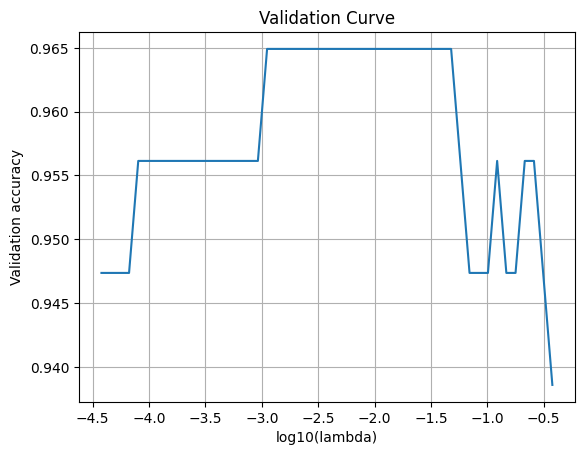

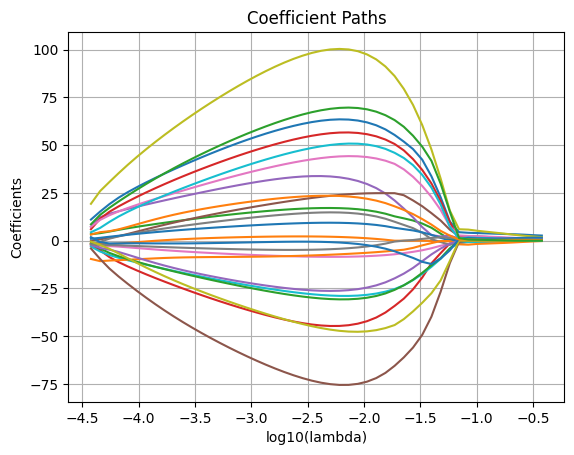

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from src.LogRegCDD import LogRegCDD 


LogRegCDD_Breast_Cancer = LogRegCDD(alpha=1.0, n_lambda=50)

LogRegCDD_Breast_Cancer.fit(X_train, Y_train)

val_scores = LogRegCDD_Breast_Cancer.validate(X_test, Y_test, measure="accuracy")
print("Validation scores:", val_scores)

best_lambda = LogRegCDD_Breast_Cancer.lambdas_[val_scores.argmax()]
print("Best lambda:", best_lambda)

probs = LogRegCDD_Breast_Cancer.predict_proba(X_test)
print("Probabilities:", probs[:5])

LogRegCDD_Breast_Cancer.plot_score(measure="accuracy")
LogRegCDD_Breast_Cancer.plot_coef()

In [45]:
print("Coefficients:", LogRegCDD_Breast_Cancer.coef_)

Coefficients: [ 2.69507436  0.          0.         -0.          0.          0.82786736
  0.         -0.          1.87770601 -0.         -0.         -0.19031492
 -0.         -0.         -0.         -0.          1.06572483  0.54382434
  0.          0.          1.60053884  0.27908445  0.        ]


In [46]:
LogRegCDD_Breast_Cancer.validate(X_test, Y_test, measure="logloss")

array([0.46244549, 0.5377778 , 0.54044903, 0.54647812, 0.55348397,
       0.56235072, 0.57288851, 0.58407569, 0.59541159, 0.6067831 ,
       0.61817341, 0.6295348 , 0.64080201, 0.65190955, 0.66280455,
       0.67344969, 0.68381854, 0.69388861, 0.70363531, 0.71302762,
       0.72202523, 0.73057669, 0.73861798, 0.746071  , 0.75284119,
       0.75881408, 0.76247118, 0.76376442, 0.76478884, 0.76548542,
       0.7657889 , 0.76563436, 0.76324106, 0.75652502, 0.74652894,
       0.72707019, 0.7012157 , 0.65761091, 0.56301457, 0.31200807,
       0.11086058, 0.11067435, 0.10186443, 0.09942372, 0.09871828,
       0.10010088, 0.10302141, 0.10736171, 0.1141189 , 0.1224371 ])